> **MEDICAL TERMS AND DEFINITIONS**

<span style="font-size:16px;">**Polyuria** is a condition where the body urinates more than usual and passes excessive or abnormally large amounts of urine each time you urinate. Polyuria is defined as the frequent passage of large volumes of urine – more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres. <br/> <br/> **Polydipsia** is a medical name for the feeling of extreme thirstiness. Polydipsia is often linked to urinary conditions that cause you to urinate a lot. This can make your body feel a constant need to replace the fluids lost in urination. It can also be caused by physical processes that cause you to lose a lot of fluid.<br/> <br/> **Genital Thrush (or candidiasis)** is a common condition caused by a type of yeast called Candida. It mainly affects the vagina, though may affect the penis too, and can be irritating and painful. Many types of yeast and bacteria naturally live in the vagina and rarely cause problems. <br/> <br/> **Partial Paresis** Paresis involves the weakening of a muscle or group of muscles. It may also be referred to as partial or mild paralysis. Unlike paralysis, people with paresis can still move their muscles. These movements are just weaker than normal. <br/> <br/> **Polyphagia** also known as hyperphagia, is the medical term for excessive or extreme hunger. It's different than having an increased appetite after exercise or other physical activity. While your hunger level will return to normal after eating in those cases, polyphagia won't go away if you eat more food. <br/> <br/> **Alopecia** Areata is a condition that causes hair to fall out in small patches, which can be unnoticeable.</span>

**Dataset Information:**

* **Age** 1.20-65

* **Sex** 1. Male, 2.Female

* **Polyuria** 1.Yes, 2.No.

* **Polydipsia** 1.Yes, 2.No.

* **sudden weight loss** 1.Yes, 2.No.

* **weakness** 1.Yes, 2.No.

* **Polyphagia** 1.Yes, 2.No.

* **Genital thrush** 1.Yes, 2.No.

* **visual blurring** 1.Yes, 2.No.

* **Itching** 1.Yes, 2.No.

* **Irritability** 1.Yes, 2.No

* **delayed healing** 1.Yes, 2.No.

* **partial paresis** 1.Yes, 2.No.
 
* **muscle stiffness** 1.Yes, 2.No

* **Alopecia** 1.Yes, 2.No.

* **Obesity** 1.Yes, 2.No.

* **Class** 1.Positive, 2.Negative.

# Data Preparation

**Import Libraries**

In [20]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import _tree
import eli5
from eli5.sklearn import PermutationImportance




**Load data**

In [21]:
diab_data=pd.read_csv('diabetes_data_upload.csv')

**View data**

**Preview the first five rows of the dataset**

In [22]:
diab_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [23]:
diab_data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'visual blurring', 'Itching', 'Irritability',
       'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia',
       'Obesity', 'class'],
      dtype='object')

In [24]:
diab_data.shape

(520, 16)

In [25]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   visual blurring     520 non-null    object
 8   Itching             520 non-null    object
 9   Irritability        520 non-null    object
 10  delayed healing     520 non-null    object
 11  partial paresis     520 non-null    object
 12  muscle stiffness    520 non-null    object
 13  Alopecia            520 non-null    object
 14  Obesity             520 non-null    object
 15  class               520 non-null    object
dtypes: int64(1), object(15)
me

# Data Cleaning

In [26]:
diab_data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [27]:
diab_data1 = diab_data.copy() #dataset copy

def age(i):
    for x in range(10,100,10):
        if i<x:
            m = f'{x-10}-{x}'
            return m
            break

diab_data1['age_group'] = diab_data['Age'].apply(lambda x:age(x))
diab_data1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,age_group
0,40,Male,No,Yes,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,40-50
1,58,Male,No,No,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Positive,50-60
2,41,Male,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Positive,40-50
3,45,Male,No,No,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,40-50
4,60,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,60-70


In [28]:
label_encoder = preprocessing.LabelEncoder()

for column in diab_data.columns[1:]:
    diab_data[column] =  label_encoder.fit_transform(diab_data[column])
    
diab_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Training the Data



In [29]:
X = diab_data.drop('class', axis =1)
y = diab_data['class']

In [30]:
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state = 1)

In [31]:
print('The shape of X_train', X_train.shape)
print('The shape of X_test', X_test.shape)
print('The shape of y_train', y_train.shape)
print('The shape of y_test', y_test.shape)

The shape of X_train (416, 15)
The shape of X_test (104, 15)
The shape of y_train (416,)
The shape of y_test (104,)


# **Building the Models**


Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 

In [32]:
lr = LogisticRegression()
lr

LogisticRegression()

In [33]:
lr.fit(X_train, y_train)
print(f'model score on training data: {lr.score(X_train, y_train)}')
print(f'model score on testing data: {lr.score(X_test, y_test)}')
lr_pred = lr.predict(X_test)

model score on training data: 0.9302884615384616
model score on testing data: 0.9519230769230769


c:\Users\Rohan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print(len(X_train.columns.tolist()))
len(lr.coef_[0])

15


15

<span style= "font-size:18px; font-weight:bold;">Feature Importance for Logistic Regression</span>

Text(0.5, 1.0, 'Logistic Regression Feature Importances')

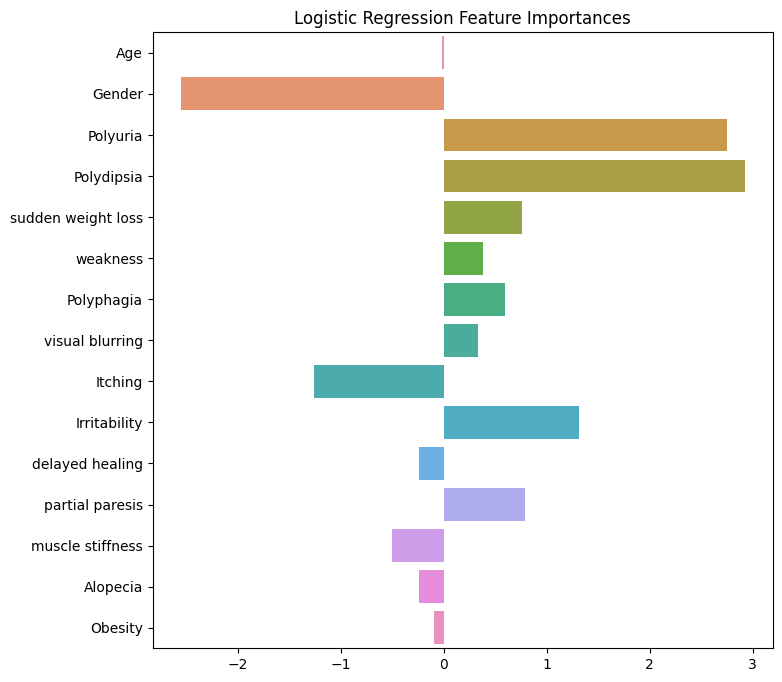

In [35]:
plt.figure(figsize = (8,8))
sns.barplot(x = lr.coef_[0], y = X_train.columns.tolist())
plt.title('Logistic Regression Feature Importances')

 > **Observation**

 The chart above shows the features that are most important for an individual to be at risk of having diabetes. we are going to consider nine most important features / symptoms,they are Polydipsia, polyuria, partial paresis, irritability, sudden weight loss, genital thrush, polyphagia,visual blurring,weakness.

<span style= "font-size:18px; font-weight:bold;">Permutation Importance for Logistic Regression</span>

In [36]:
perm = PermutationImportance(lr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1346 ± 0.0544,Polyuria
0.1288 ± 0.0449,Polydipsia
0.1019 ± 0.0627,Gender
0.0462 ± 0.0077,Irritability
0.0269 ± 0.0224,Itching
0.0154 ± 0.0094,visual blurring
0.0135 ± 0.0094,sudden weight loss
0.0115 ± 0.0144,weakness
0.0096 ± 0.0122,Age
0.0077 ± 0.0077,Polyphagia



<span style= "font-size:18px; font-weight:bold;">Confusion Matrix for Logistic Regression</span>

Confusion matrix, a table that describes the performance of a classification model. Confusion Matrix tells us how many our model predicted correctly and incorrectly in terms of binary/multiple outcome classes by comparing actual and predicted cases.

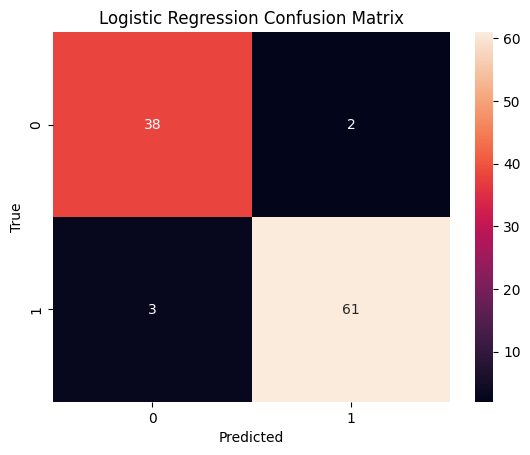

In [37]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [38]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.97      0.95      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



<span style= "font-size:20px; font-weight:bold;">Random Forest Classifier </span>

Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

In [39]:
rf = RandomForestClassifier(random_state= 10)
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

print (f'model score on training data: {rf.score(X_train, y_train)}')
print (f'model score on testing data: {rf.score(X_test, y_test)}')

model score on training data: 1.0
model score on testing data: 0.9903846153846154


In [40]:
print(len(X_train.columns.tolist()))
len(rf.feature_importances_)

15


15

Text(0.5, 1.0, 'Random Forest Feature Importances')

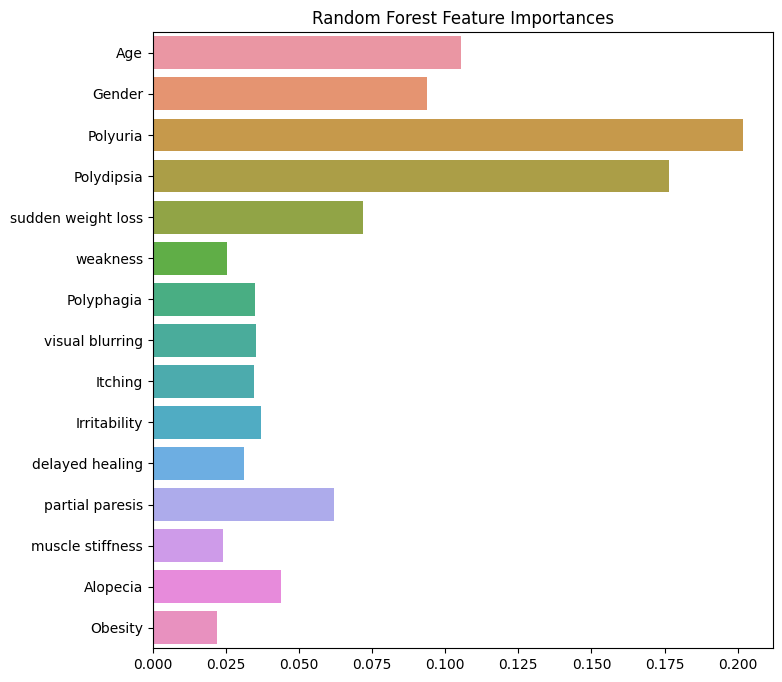

In [45]:
plt.figure(figsize = (8,8))
sns.barplot(x = rf.feature_importances_, y = X_train.columns.tolist())
plt.title('Random Forest Feature Importances')

<span style= "font-size:20px; font-weight:bold;">Permutation Importance for Random Forest Classifier</span> 

In [42]:
perm = PermutationImportance(rf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1308 ± 0.0578,Polyuria
0.0981 ± 0.0477,Polydipsia
0.0423 ± 0.0396,Gender
0.0192 ± 0.0122,partial paresis
0.0192 ± 0.0122,visual blurring
0.0173 ± 0.0077,Alopecia
0.0154 ± 0.0094,delayed healing
0.0154 ± 0.0196,Age
0.0096 ± 0.0122,Itching
0.0096 ± 0.0122,weakness


<span Style="font-size:18px; font-weight:bold;"> Observation</span> 

We predicted 0.97, whereas the base_value is 0.6136. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. The biggest impact comes from Polyuria and Polydipsia. Though the Gender has a meaningful effect decreasing the prediction.

<span style= "font-size:18px; font-weight:bold;">Confusion Matrix for Random Forest</span>

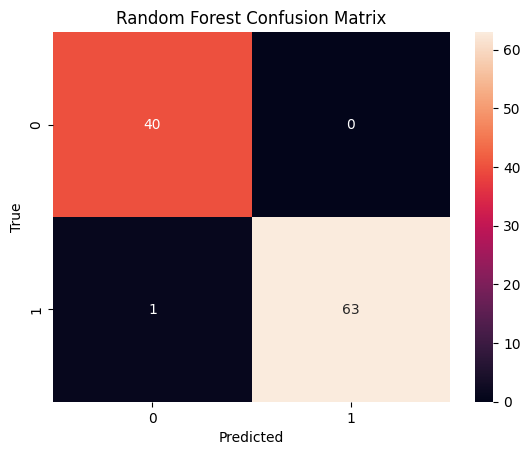

In [43]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [44]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

